# Predict Airbnb User Bookings From Web Sessions
#### By: David Gibson

## Table of contents

1. [Introduction](#Introduction)

2. [Data Cleaning](#Data-Cleaning)

3. [Exploratoty Data Analysis](#Exploratoty-Data-Analysis)

4. [Modeling](#Modeling)

4. [Model Evaluation ](#Model-Evaluation )

## Introduction:
#### Goal:
Using the data from the Kaggle x Airbnb competition I wanted to predict wether or not a user will make a reservation based on their user data and their web session data.

#### Data:
Three data sets were used in this project.
- Training user demographics
- Test user demographics
- Web sessions for 

#### Methodology:
Create new features by performing One Hot Encoding on session data. Join new features with training data. Extract most important features from random forest. Finally build multiple classification models and evaluate performance.

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Set default Seaborn style
sns.set()

In [5]:
# Load Session Data
sesh = pd.read_csv('data/Original/sessions.csv', index_col = 0, nrows=10000)

In [6]:
# Save times to calculate sesh times and then drop
times = pd.DataFrame(sesh.secs_elapsed)
sesh = sesh.drop('secs_elapsed', 1)

# Load train data to filter out test users because kaggle did not provide predicted varible in download.
train_users_2 = pd.read_csv('data/Original/train_users_2.csv', index_col = 0) 
sesh = sesh.loc[sesh.index.isin(train_users_2.index)]

# Save user ids
user_ids = set(sesh.index)

### One Hot Encoding

Create new features for machine learning by perform one hot encoding.

In [13]:
# One Hot Encodingb
sesh_dummies = pd.get_dummies(sesh)
sesh_dummies.head()

,secs_elapsed,action_10,action_12,action_15,action_account,action_active,action_add_guests,action_ajax_check_dates,action_ajax_google_translate_description,action_ajax_image_upload,...,action_detail_your_listings,action_detail_your_trips,device_type_-unknown-,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Windows Desktop,device_type_iPad Tablet,device_type_iPhone
user_id,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,319.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,67753.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,301.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,22141.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,435.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Combine all users sessions
full_sesh = pd.DataFrame()
for i in user_ids:
    df = sesh_dummies.loc[sesh_dummies.index == i] # Filters by id
    values = df.sum(axis=0) # Sums values vertically
    row = values.to_frame().T # Trasnposed data
    row['id'] = i
    full_sesh = full_sesh.append(row) # Adds row to df 

full_sesh.set_index('id', inplace=True) # Reset index
full_sesh.head()

,secs_elapsed,action_10,action_12,action_15,action_account,action_active,action_add_guests,action_ajax_check_dates,action_ajax_google_translate_description,action_ajax_image_upload,...,action_detail_your_listings,action_detail_your_trips,device_type_-unknown-,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Windows Desktop,device_type_iPad Tablet,device_type_iPhone
id,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mde5wnphhf,903948.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0
rlzzowgaji,331110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
mrvjvk6ycy,1166019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,127.0,0.0,0.0,0.0
1066rvqlm6,1043723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0


Create additional features if an action was ever performed.

In [ ]:
# Create binary column if action was ever performed
def create_column_1_0(df, colnamelist):
    '''Creates a new binary column'''
    for colname in colnamelist:
        items = list(df['{}'.format(colname)]) #Paste colname in
        new_items = [x if x == 0 else 1 for x in items] #If value is not zero make it a 1
        df['{}_0_1'.format(colname)] = new_items
        
    return df

colnames_to_convert = list(full_sesh)[1:full_sesh.shape[1]] # Create list of colnames
full_sesh = create_column_1_0(full_sesh, colnames_to_convert) # Create new binary columns
full_sesh.reindex_axis(sorted(full_sesh.columns), axis=1) # Order colnames alphabetically

### Session Times

In [ ]:
# Calculate min max mean for session times
sesh_times = pd.DataFrame()

for i in user_ids:
    if type(i) == str:
        df = times.loc[times.index == i] # Filters by id

        user_times = list(df['secs_elapsed']) # Create list of times
        user_times = [x for x in user_times if str(x) != 'nan'] # Remove nan

        if user_times != []:
            row_min = min(user_times) # Calc min
 
            row_max = max(user_times) # Calc max
            row_mean = np.mean(user_times) # Calc mean
            row_sum = np.sum(user_times) # Calc total

            if len(user_times) > 1: # If sessions > 1 calc standar deviation and how many 
                row_std = np.std(user_times) 
                row_len = len(user_times)  
        else: # if there is not time data 
            row_min = 0
            row_max = 0
            row_mean = 0
            row_sum = 0
            row_std = 0
            row_len = 0

        row_id = i
        row = pd.DataFrame(data={'id': [row_id], 'session_time_min': [row_min], 
                                'session_time_max': [row_max], 'session_time_mean': [row_mean], 
                                'session_time_std': [row_std], 'session_time_total': [row_sum], 
                                 'session_count': [row_len]})
        
        sesh_times = row.append(sesh_times)

sesh_times.set_index('id', inplace=True)

# Inspect
print('Session times dataframe size: {}'.format(sesh_times.shape))
sesh_times.head(5)

In [ ]:
# Combine time data and combine dubs
sesh_times = sesh_times.groupby(sesh_times.index).sum()
full_session = sesh_times.join(full_sesh)

In [ ]:
# Export data
full_session.to_csv('data/sessions_clnd.csv')

### Remaining

#### User Data Cleaning

In [ ]:
# Load Train
train_users_2 = pd.read_csv('data/Original/train_users_2.csv', index_col = 0) 

# Create column if there was a destination made
destinations = train_users_2['country_destination']
made_reservation = [0 if x == 'NDF' else 1 for x in destinations]
train_users_2['made_reservation'] = made_reservation

# Create column for time from first active to first booking
train_users_2['date_account_created'] = pd.to_datetime(train_users_2['date_account_created'])
train_users_2['date_first_booking'] = pd.to_datetime(train_users_2['date_first_booking'])
train_users_2['elapsed_time'] = train_users_2['date_first_booking'] - train_users_2['date_account_created']

In [ ]:
# Export
train = pd.merge(train_users_2, full_session, left_index = True, right_index=True)
train.to_csv('data/train.csv')

## Exploratoty Data Analysis

Explorartoy analzys to get a feel for the data and see if anything stands out. Took subset of 1000 users who made a reservation and 1000 who did not make a reservation.

In [3]:
train = pd.read_csv('data/train.csv', index_col = 0)

# Subest training data 1000 reserved and 1000 not reserved
reserved = train.loc[train.made_reservation == 1][0:1000]
not_reserved = train.loc[train.made_reservation == 0][0:1000]

eda_data = reserved.append(not_reserved)

### Feature Importance

To extract the most important features I used a Random Forest. 

In [19]:
# Set random seed
np.random.seed(123)

# Make data all numeric
df = eda_data.drop(['made_reservation', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'elapsed_time', 'country_destination'], axis=1)
df = pd.get_dummies(df)
df = df.fillna(0)

y = pd.factorize(eda_data.made_reservation)[0]
features = df.drop(['made_reservation'])
         
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(features, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# Create df of feature importance
feats = pd.DataFrame(clf.feature_importances_, df.columns)
feats.columns = ['importance']
feats = feats.sort_values(by='importance', ascending=False)
top_20_feats = feats.head(20)

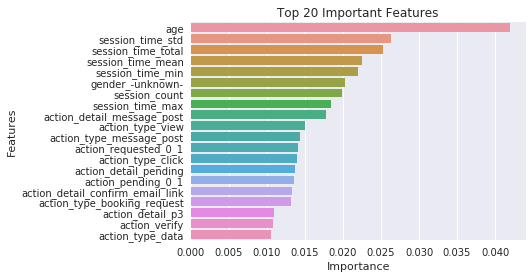

In [21]:
# Plot Feature importance
sns.barplot(x='importance', y=top_20_feats.index, data=top_20_feats)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Top 20 Important Features')

plt.show()

We can see that Session times play a major role in predicting if a user will make a reservation or not. Lets take a closer look at this. 

### Session Times

In [22]:
sesh = pd.read_csv('data/Original/sessions.csv', index_col = 0)
times = pd.DataFrame(sesh.secs_elapsed)

In [23]:
res = pd.DataFrame(eda_data.made_reservation)

df3 = pd.merge(res, times, left_index=True, right_index=True)
df3 = pd.DataFrame(df3.secs_elapsed[~np.isnan(df3.secs_elapsed)])

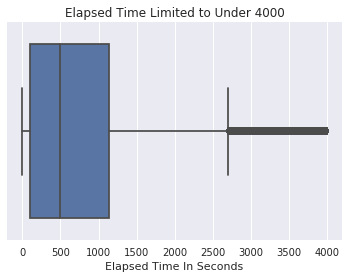

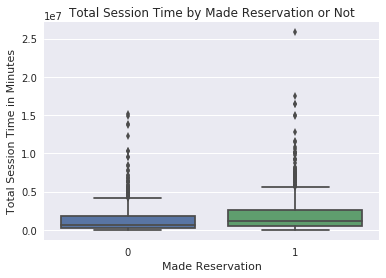

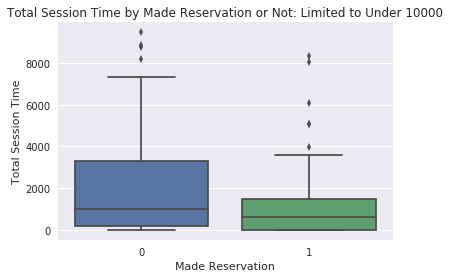

In [24]:
sns.boxplot(x="secs_elapsed", data=df3[df3.secs_elapsed < 4000])
plt.xlabel('Elapsed Time In Seconds')
plt.title('Elapsed Time Limited to Under 4000')

plt.show()

sns.boxplot(x="made_reservation", y='session_time_total', data=eda_data)
plt.ylabel('Total Session Time in Minutes')
plt.xlabel('Made Reservation')
plt.title('Total Session Time by Made Reservation or Not')
plt.show()

sns.boxplot(x="made_reservation", y='session_time_total', data=eda_data[eda_data.session_time_total < 10000])
plt.ylabel('Total Session Time')
plt.xlabel('Made Reservation')
plt.title('Total Session Time by Made Reservation or Not: Limited to Under 10000')
plt.show()

In [25]:
print('Reserved Session Time Total Mean: {}'.format(eda_data[eda_data.made_reservation == 1].session_time_total.mean()))
print('Not Reserved Session Time Total Mean: {}'.format(eda_data[eda_data.made_reservation == 0].session_time_total.mean()))

Reserved Session Time Total Mean: 1903082.381
Not Reserved Session Time Total Mean: 1303876.259


We immediately see that users who made a reserveation tend to spend less time logged in. But what is the significant cut off.

## Session Count

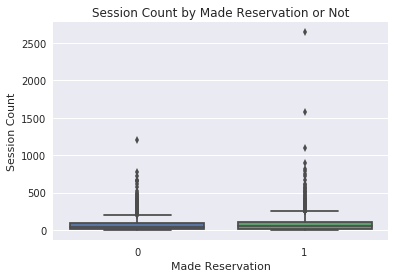

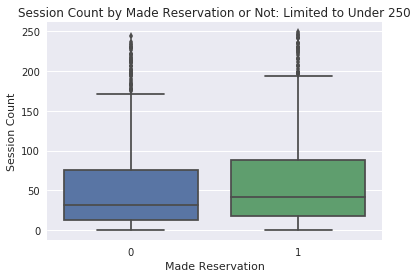

In [26]:
sns.boxplot(x="made_reservation", y="session_count", data=eda_data)
plt.ylabel('Session Count')
plt.xlabel('Made Reservation')
plt.title('Session Count by Made Reservation or Not')
plt.show()

sns.boxplot(x="made_reservation", y="session_count", data=eda_data[eda_data.session_count < 250 ])
plt.ylabel('Session Count')
plt.xlabel('Made Reservation')
plt.title('Session Count by Made Reservation or Not: Limited to Under 250')
plt.show()

In [27]:
print('Reserved Session Count Mean: {}'.format(eda_data[eda_data.made_reservation == 1].session_count.mean()))
print('Not Reserved Session Count Mean: {}'.format(eda_data[eda_data.made_reservation == 0].session_count.mean()))

Reserved Session Count Mean: 89.782
Not Reserved Session Count Mean: 71.76


From the boxplot above we see that users who make a reservation tend to have more session login.

### Time From Account Creation to Booking

In [28]:
reserved.elapsed_time = pd.to_numeric(reserved.elapsed_time.map(lambda x: str(x)[:-24]))

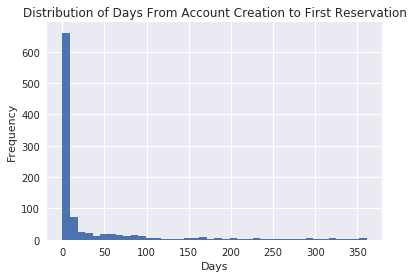

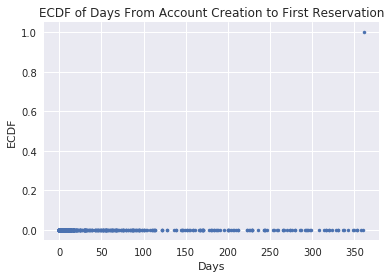

In [29]:
# Create histogram plot
plt.hist(reserved.elapsed_time, bins = 40)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Distribution of Days From Account Creation to First Reservation')

plt.show()

Most users will create their account and make a resevation in the same day.

### Age

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


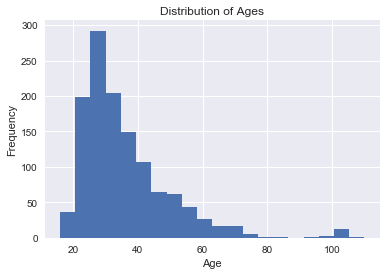

In [4]:
# Discovered invalid ages above 200
# Replaced invalid ages is NaN
eda_data.age[eda_data.age > 110] = np.NaN

# Create histogram plot
plt.hist(eda_data.age[~np.isnan(eda_data.age)], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

plt.show()

## Gender

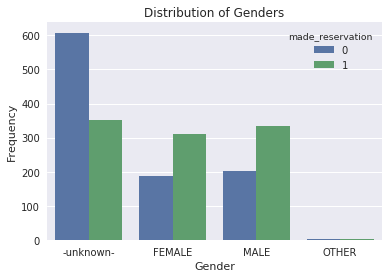

In [32]:
sns.countplot(x='gender', hue='made_reservation', data=eda_data)
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of Genders')

plt.show()

### Signup Method

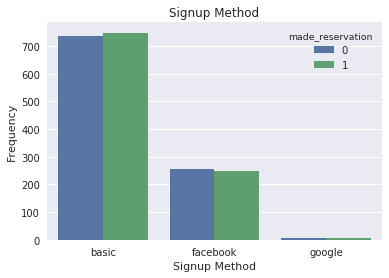

In [33]:
sns.countplot(x='signup_method', hue='made_reservation', data=eda_data)
plt.ylabel('Frequency')
plt.xlabel('Signup Method')
plt.title('Signup Method')

plt.show()

# Modeling

## Load Data

In [34]:
# Load train data
data = pd.read_csv('data/train.csv', index_col = 0)
data.shape

(73869, 850)

In [35]:
# Create booking rate for age bins
reservation = data.made_reservation
age = data.age
age = age.fillna(0) # Fill na so crosstabe calculates for NaN

age_table = pd.crosstab(age, reservation)
age_booking_rate = dict(age_table[1] / age_table.sum(axis=1))
ages_br = [age_booking_rate.get(item,item) for item in list(age)]

# Replace age
data.age = ages_br

In [36]:
# Filter top n featurs from random forest
data =  pd.get_dummies(data)

features = list(feats.head(20).index)
# features.remove('age') #Removes for normalization
data = data[features]

## Build Model

In [37]:
# Normalize
data = (data - data.mean()) / (data.max() - data.min())

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(data, reservation, test_size=0.3, random_state=0)

# Models with 70/30 split
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Support Vector Machine
svmachine = svm.SVC()
svmachine.fit(X_train, y_train)

# k Nearest Neighbor
knneighbor = KNeighborsClassifier(n_neighbors=100)
knneighbor.fit(X_train, y_train)

# Naive Bayes
nbayes = GaussianNB()
nbayes.fit(X_train, y_train)

# XGBoost
xgboost = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.05)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
# Calculate Accuracies
# Logistic Regression
logreg_pred = logreg.predict(X_test)
logreg_accuracy = logreg.score(X_test, y_test) * 100

# Support Vector Machine
svmachine_pred = svmachine.predict(X_test)
svmachine_accuracy = svmachine.score(X_test, y_test) * 100

# k Nearest Neighbor
knneighbor_pred = knneighbor.predict(X_test)
knneighbor_accuracy = knneighbor.score(X_test, y_test) * 100

# Naive Bayes
nbayes_pred = nbayes.predict(X_test)
nbayes_accuracy = nbayes.score(X_test, y_test) * 100

# XGBoost
xgboost_pred = xgboost.predict(X_test)
xgboost_accuracy = xgboost.score(X_test, y_test) * 100

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
# Print Accuracies
print('Accuracy of Logistic Regression: {}%'.format(logreg_accuracy))
print('Accuracy of Support Vector Machine: {}%'.format(svmachine_accuracy))
print('Accuracy of k-Nearest Neighbor: {}%'.format(knneighbor_accuracy))
print('Accuracy of Naive Bayes Gaussian: {}%'.format(nbayes_accuracy))
print('Accuracy of XGBoost: {}%'.format(xgboost_accuracy))

Accuracy of Logistic Regression: 74.1798655295%
Accuracy of Support Vector Machine: 72.9976084112%
Accuracy of k-Nearest Neighbor: 74.5273227742%
Accuracy of Naive Bayes Gaussian: 70.461621768%
Accuracy of XGBoost: 75.7186047561%


## Cross Validation

In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# 10 fold split
kfold = model_selection.KFold(n_splits=10, random_state=7)

# Run models
scoring = 'accuracy'
logreg_cv = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
svmachine_cv = model_selection.cross_val_score(svmachine, X_train, y_train, cv=kfold, scoring=scoring)
knneighbor_cv = model_selection.cross_val_score(knneighbor, X_train, y_train, cv=kfold, scoring=scoring)
nbayes_cv = model_selection.cross_val_score(nbayes, X_train, y_train, cv=kfold, scoring=scoring)
xgboost_cv = model_selection.cross_val_score(xgboost, X_train, y_train, cv=kfold, scoring=scoring)

print("Logistic Regression 10-fold cross validation average accuracy: %.3f" % (logreg_cv.mean()))
print("Support Vector Machine 10-fold cross validation average accuracy: %.3f" % (svmachine_cv.mean()))
print("k-Nearest Neighbor 10-fold cross validation average accuracy: %.3f" % (knneighbor_cv.mean()))
print("Naive Bayes Gaussian 10-fold cross validation average accuracy: %.3f" % (nbayes_cv.mean()))
print("XGBoost 10-fold cross validation average accuracy: %.3f" % (xgboost_cv.mean()))

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

Logistic Regression 10-fold cross validation average accuracy: 0.738
Support Vector Machine 10-fold cross validation average accuracy: 0.728
k-Nearest Neighbor 10-fold cross validation average accuracy: 0.741
Naive Bayes Gaussian 10-fold cross validation average accuracy: 0.702
XGBoost 10-fold cross validation average accuracy: 0.753


/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Model Evaluation 

## Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_df(target_var, model_pred):
    c_matrix = confusion_matrix(target_var, model_pred)
    confusion_df = pd.DataFrame(c_matrix)

    confusion_df = confusion_df.append([[list(confusion_df.sum(axis=1))[0],
                                         list(confusion_df.sum(axis=1))[1]]])

    confusion_df['Sum'] = list(confusion_df.sum(axis=1))

    confusion_df.columns = ['Predicted: No', 'Predicted: Yes', 'Sum']
    confusion_df.index = ['Actual: No', 'Actual: Yes', 'Sum']

    return confusion_df

In [44]:
# Create confusion Matrix's
logreg_confusion = confusion_matrix_df(y_test, logreg_pred)
svmachine_confusion = confusion_matrix_df(y_test, svmachine_pred)
knn_confusion = confusion_matrix_df(y_test, knneighbor_pred)
nbayes_confusion = confusion_matrix_df(y_test, nbayes_pred)
xgboost_confusion = confusion_matrix_df(y_test, xgboost_pred)

Logistic RegressionConfusion Matrix


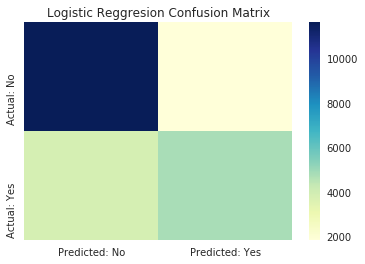

,Predicted: No,Predicted: Yes,Sum
Actual: No,11614,1853,13467
Actual: Yes,3869,4825,8694
Sum,13467,8694,22161


In [45]:
print('Logistic RegressionConfusion Matrix')
sns.heatmap(logreg_confusion.iloc[0:2,0:2], cmap="YlGnBu")
plt.title('Logistic Reggresion Confusion Matrix')
plt.show()
logreg_confusion

Support Vector Machine Confusion Matrix


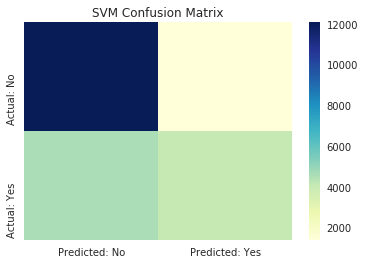

,Predicted: No,Predicted: Yes,Sum
Actual: No,12080,1387,13467
Actual: Yes,4597,4097,8694
Sum,13467,8694,22161


In [46]:
print('Support Vector Machine Confusion Matrix')
sns.heatmap(svmachine_confusion.iloc[0:2,0:2], cmap="YlGnBu")
plt.title('SVM Confusion Matrix')
plt.show()
svmachine_confusion

k-Nearest Neighbor Confusion Matrix


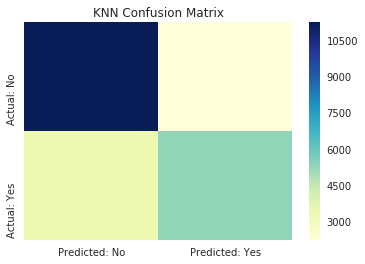

,Predicted: No,Predicted: Yes,Sum
Actual: No,11216,2251,13467
Actual: Yes,3394,5300,8694
Sum,13467,8694,22161


In [47]:
print('k-Nearest Neighbor Confusion Matrix')
sns.heatmap(knn_confusion.iloc[0:2,0:2], cmap="YlGnBu")
plt.title('KNN Confusion Matrix')
plt.show()
knn_confusion

Naive Bayes Confusion Matrix


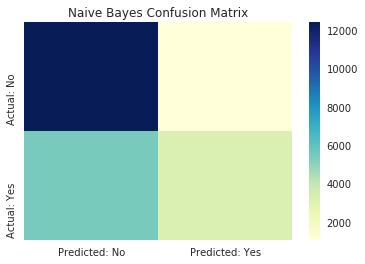

,Predicted: No,Predicted: Yes,Sum
Actual: No,12394,1073,13467
Actual: Yes,5473,3221,8694
Sum,13467,8694,22161


In [48]:
print('Naive Bayes Confusion Matrix')
sns.heatmap(nbayes_confusion.iloc[0:2,0:2], cmap="YlGnBu")
plt.title('Naive Bayes Confusion Matrix')
plt.show()
nbayes_confusion

XGBoost Confusion Matrix


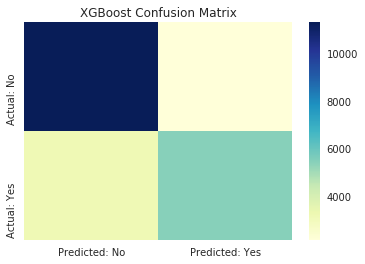

,Predicted: No,Predicted: Yes,Sum
Actual: No,11313,2154,13467
Actual: Yes,3227,5467,8694
Sum,13467,8694,22161


In [49]:
print('XGBoost Confusion Matrix')
sns.heatmap(xgboost_confusion.iloc[0:2,0:2], cmap="YlGnBu")
plt.title('XGBoost Confusion Matrix')
plt.show()
xgboost_confusion

## ROC Curve

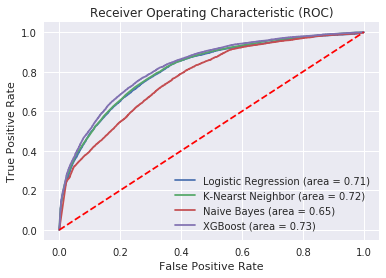

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, knneighbor_pred)
fpr_k, tpr_k, thresholds = roc_curve(y_test, knneighbor.predict_proba(X_test)[:,1])

# svm_roc_auc = roc_auc_score(y_test, svmachine_pred)
# fpr_s, tpr_s, thresholds = roc_curve(y_test, svmachine.predict_proba(X_test)[:,1]) 

nb_roc_auc = roc_auc_score(y_test, nbayes_pred)
fpr_n, tpr_n, thresholds = roc_curve(y_test, nbayes.predict_proba(X_test)[:,1])

xgb_roc_auc = roc_auc_score(y_test, xgboost_pred)
fpr_x, tpr_x, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_k, tpr_k, label = 'K-Nearst Neighbor (area = %0.2f)' % knn_roc_auc)
# plt.plot(fpr_s, tpr_s, label = 'Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot(fpr_n, tpr_n, label = 'Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr_x, tpr_x, label = 'XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--') #red dash line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()